<a href="https://www.kaggle.com/code/jonandoan/jonan-doan-bta419-bank-additional-full?scriptVersionId=97682191" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cbank-data/bank-data-full.csv


# Project Introduction
The goal for this project is to examin and analyze which data variables are important to consider so that we can increase our success with the marketing campaign. I will be using statistical model such as a Random Forrest Statistical Model to find which data attribute has an influence on the term deposit decision. I will also be using bar graph to show which variables that has the most relevance to the term deposit and also to show the relationship between age and deposit. (Note this is my first kaggle notebook. I am planning on updating this document whenever I got some free time from school.)

# Main Finding
* **Age** seems to have the highest feature importance so it may be important to look at the relationship with the different age demographic with the term deposit.
* Most of our client had declined the term deposit. Out of all of our client(**41,188 individuals**), only **4640** (**11.3%**) of them accepted the term deposit.
* Majority of our client fall in the **adult(30-60 years old)** age range. Out of the total **32,895** adult client, only **3,102(9.43%)** of them accepted the term deposit.


# Background
**What is a term deposit?**

" A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits. " - [Investopedia](https://www.investopedia.com/terms/t/termdeposit.asp)
## Here are the variables we will be looking at:

### Bank Client Data:
1 - **age**: (numeric)

2 - **job**: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - **marital**: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - **education**: (categorical: primary, secondary, tertiary and unknown)

5 - **default**: has credit in default? (categorical: 'no','yes','unknown')

6 - **housing**: has housing loan? (categorical: 'no','yes','unknown')

7 - **loan**: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
8 - **contact**: contact communication type (categorical: 'cellular','telephone')

9 - **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - **day**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other Attributes:
12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - **previous**: number of contacts performed before this campaign and for this client (numeric)

15 - **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)

17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)

18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)

19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)

20 - **nr.employed**: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - **y** - has the client subscribed a term deposit? (binary: 'yes','no')


# Loading the File

In [2]:
#Read in the dataset
account = pd.read_csv("/kaggle/input/cbank-data/bank-data-full.csv")
#give us a quick preview of the first 5 rows in the bank dataset
account.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Describing the Data Set

From the code below we can see that there are 21 columns and 41188 rows. This will be helpful to seeing how many data are in our dataset

In [3]:
#give us the number of rows and columns (rows, columns)
account.shape

(41188, 21)

**From the Code below we can see that the dataset has :**
* no null values since all the value column all meet the max number of rows of a number of 41188

    -Thankfully there is no null values, otherwise we would have to explore the dataset further and fill all missing values
    
* There are 5 float columns (cons.price.idx,emp.var.rate, cons.conf.idx, euribor3m, nr.employed)
* There are 5 interger columns (age, duration, campaign, pdays, previous)
* There are 11 object columns (job, marital, education, default, housing, loan, contact, month, day_of_the_week, poutcome, y)

In [4]:
#give us the indexes, the column names, number of entries, what columns have null values, and the data type for each column
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**From the code below we can see that the dataset has:**
* Age has mean that is approximately 40 years old, minimum of 17 years old and a max of 98 years old

Note: not all the columns are listed below  since some of the data are categorical values and not numerical values

In [5]:
#Give us a summary of statistics pertaining to dataframe columns
account.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Selecting Important Data

Since there are some columns that may be irrelevant to the client's decision of accepting and declining the term deposit, I decided to focus the variable that I feel that some relevance.

**Here are the variables and the reason why I chose it:**
* **age, job, marital, education**: Helps us determine the demographic and financial situation of our clients. 
* **housing, loan** : helps us to determine if the number of debt play a part in accepting and declining the term deposit.
* **contact**: Helps us to determin what is the best way to contact our client 
* **poutcome**: May help us to compare our current marketing campaign with our previous outcome and if we made any improvement or not. 
* **month, day_of_week**: Helps us determine if there is a particular month or day our client would like us to contact them 


In [6]:
#Looking at columns name
account.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
#Selecting which columns may be important to look at
account_subset = account[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan','y','contact','poutcome','month','day_of_week']].copy()
account_subset.head()

,age,job,marital,education,default,housing,loan,y,contact,poutcome,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,no,telephone,nonexistent,may,mon
1,57,services,married,high.school,unknown,no,no,no,telephone,nonexistent,may,mon
2,37,services,married,high.school,no,yes,no,no,telephone,nonexistent,may,mon
3,40,admin.,married,basic.6y,no,no,no,no,telephone,nonexistent,may,mon
4,56,services,married,high.school,no,no,yes,no,telephone,nonexistent,may,mon


**Note: I change y to deposit to make it easier to analyze**

In [8]:
#Renaming column "Y" to "Deposit"
account_subset.rename(columns = {'y':'deposit'}, inplace = True)
account_subset.head()

,age,job,marital,education,default,housing,loan,deposit,contact,poutcome,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,no,telephone,nonexistent,may,mon
1,57,services,married,high.school,unknown,no,no,no,telephone,nonexistent,may,mon
2,37,services,married,high.school,no,yes,no,no,telephone,nonexistent,may,mon
3,40,admin.,married,basic.6y,no,no,no,no,telephone,nonexistent,may,mon
4,56,services,married,high.school,no,no,yes,no,telephone,nonexistent,may,mon


# Creating the Random Forrest

### What is a Random Forrest Model?
"Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction" - [Medium](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

### Why are we using it?
We are using it to see if their is any relationship between the variables that we have selected with the term deposit. We are also trying to find out which of the variables that we have chosen is highly associated with the term deposit.

* Here are the resources that helped me implement my code: [Medium](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76), [Youtube](https://www.youtube.com/watch?v=YYjvkSJoui4)
  

Note: Since Machine Learning algorithm can only understands Numerical Values, we need to convert all our categorical values to numerical values so that our Random Forrest Model can process our data. 

In [9]:
#Changing categorical values to numeric value in the dataset
account_subset['job'] = account_subset['job'].astype('category').cat.codes
account_subset['marital'] = account_subset['marital'].astype('category').cat.codes
account_subset['education'] = account_subset['education'].astype('category').cat.codes
account_subset['deposit'] = account_subset['deposit'].astype('category').cat.codes
account_subset['default'] = account_subset['default'].astype('category').cat.codes
account_subset['housing'] = account_subset['housing'].astype('category').cat.codes
account_subset['loan'] = account_subset['loan'].astype('category').cat.codes
account_subset['contact'] = account_subset['contact'].astype('category').cat.codes
account_subset['poutcome'] = account_subset['poutcome'].astype('category').cat.codes
account_subset['month'] = account_subset['month'].astype('category').cat.codes
account_subset['day_of_week'] = account_subset['day_of_week'].astype('category').cat.codes
account_subset.head()

,age,job,marital,education,default,housing,loan,deposit,contact,poutcome,month,day_of_week
0,56,3,1,0,0,0,0,0,1,1,6,1
1,57,7,1,3,1,0,0,0,1,1,6,1
2,37,7,1,3,0,2,0,0,1,1,6,1
3,40,0,1,1,0,0,0,0,1,1,6,1
4,56,7,1,3,0,0,2,0,1,1,6,1


In [10]:
#Define dependent variable for random forest
Y = account_subset["deposit"].values

In [11]:
#Define independent variable for random forrest
X = account_subset.drop(labels=['deposit'], axis = 1)

**Brief Summary of what is going on with the Random Forest Model**
* We will only be using 25 percent of our original dataset for our test model. 
* To have the random state running at a constant rate, I set the the initial value to 42
* The model will be initiated with 1000 decision trees

In [12]:
#Using Skicit-learn to split data into x and y sets
from sklearn.model_selection import train_test_split

#Splitting the data into x and y sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify = Y, test_size = 0.25, random_state = 42)

In [13]:
#Importing the Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier

#Initiating the model with 1000 decision tree
model = RandomForestClassifier(n_estimators=1000, random_state=42)

#Training the model on X and Y data
model.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=1000, random_state=42)

After we created out Random Forest Model, we need to test how accurate our Random Forest Tree is. Seeing how our predictiction test value compare with our actual result from the code below (Accuracy of 88.8%), we can be confident that this model is working properly and the result will be approximately correct.

In [14]:
#Creating a model for our X_test data that will give us prediction test value
prediction_test = model.predict(X_test)

#We are then comparing the Y_test data (the result) with the X_test data our (prediction_test) to test the accuracy of our forest
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(Y_test, prediction_test))

Accuracy =  0.8882198698650092


# Finding our Feature Importance from the Random Forest

In [15]:
#Get numerical feature importances
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index = feature_list).sort_values(ascending = False)
print(feature_imp)

age            0.305825
month          0.142131
poutcome       0.111265
day_of_week    0.106112
job            0.105023
education      0.085059
housing        0.044118
marital        0.040102
loan           0.030552
contact        0.018097
default        0.011716
dtype: float64


Text(0.5, 0, 'Importance')

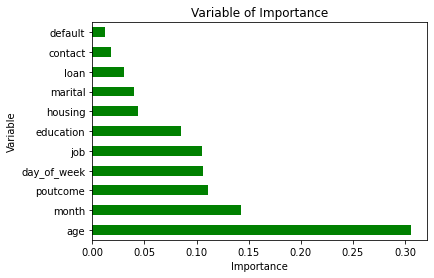

In [16]:
#Plotting the relationship
%matplotlib inline

#Plotting a horizontal bar chart with the color green and adding the title
feature_imp.plot.barh(color = 'green', title = "Variable of Importance")
#Plotting the x label
plt.ylabel("Variable")
#Plotting the y label
plt.xlabel("Importance")

# Looking at the relationship between age and deposit

Summary:
**Age** seems to have the highest feature importance so it may be important to look at the relationship with the different age demographic with the term deposit. I will be using **bar chart** and a **contingency table** to show how many individual in a particular age had agreed with the term deposit or not. 

In [17]:
#replacing deposit numerical values (0, 1) back to categorical value (no, yes)
account_subset['deposit'] = account_subset['deposit'].replace([0,1],['no','yes'])

Since the age column is currently numeric, I am going to create bins that will categorize the age base on what age range the individual client fall in.

In [18]:
#Grouping the age demographic by infant age (0-2), toddler age(2-5), younger child age(5-10), older child age(10-14), 
#teenager age (14-17),  young adult age(17-30), adult age (30-60), and elderely (60-100)

bins = [0,2,5,10,14,17,30,60,100]
labels = ['infant', 'toddler', 'young child', 'older child', 'teenager', 'young adult', 'adult', 'elderly']

#making a new column for the different type of age demographic
account_subset['age group'] = pd.cut(account_subset['age'],bins, labels = labels)

**From The Code Below We Can See That:**
* Most of our client had declined the term deposit. Out of all of our client(**41,188 individuals**), only **4640** (**11.3%**) of them accepted the term deposit.
* Majority of our client fall in the **adult(30-60 years old)** age range. Out of the total **32,895** adult client, only **3,102(9.43%)** of them accepted the term deposit.

In [19]:
#Creating Contingency Table that shows what age group accept or decline the deposit
age_deposit_ct= pd.crosstab(account_subset["age group"], account_subset["deposit"], margins = True)
age_deposit_ct.columns = ["no", "yes", "row_totals"]
age_deposit_ct.index = ["teenager", "young adult", "adult", "elderly", "column_totals"]
#Displaying the Contingency Table to see how many individual in the age group has subscribe to the term deposit or not
age_deposit_ct

,no,yes,row_totals
teenager,3,2,5
young adult,6256,1122,7378
adult,29793,3102,32895
elderly,496,414,910
column_totals,36548,4640,41188


In [20]:
#Show us the percentage of individual that accepted or deline the term deposit
percentage = pd.crosstab(account_subset["age group"], account_subset["deposit"], normalize = 'index', margins = True)
percentage.columns = ["no", "yes"]
percentage.index = ["teenager", "young adult", "adult", "elderly", "column_totals"]
percentage

,no,yes
teenager,0.600000,0.400000
young adult,0.847926,0.152074
adult,0.905700,0.094300
elderly,0.545055,0.454945
column_totals,0.887346,0.112654


Text(0.5, 1.0, 'Deposit Vs. Age Group')

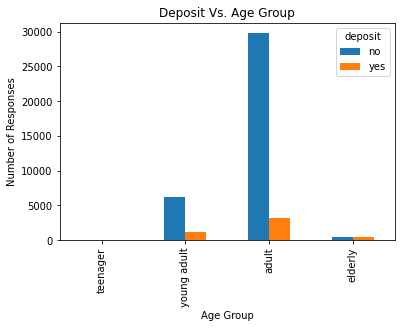

In [21]:
import matplotlib.pyplot as plt
plot = pd.crosstab(account_subset["age group"], account_subset["deposit"])
plot.plot(kind = "bar")
plt.xlabel("Age Group")
plt.ylabel("Number of Responses")
plt.title("Deposit Vs. Age Group")


# Project Summary
Throughout this project, I lean a couple of basic data analysis concepts such as exploratory analysis, statistical algorithm, and learning how to use plot and crosstab to show relationships between variables. I also learned how to do some data preparation concepts such as binning,filter all the variables that are important for our analysis using the copy function, and change categorical values to numerical values using the astype function and cat code function.  By utilizing these concepts and applying them to this bank dataset, we found that age has the highest correlation with the term deposit, most our client fall in the adult age group,and that most of our client didn’t accept the term deposit. 

A couple of things that I probably want to implement if I had more time is to plot the age/deposit scatter plot; showing the linear regresion relationship between age, job, education, and deposit; and to further explore the month/deposit relationship. The reason why I might want to implement the scatterplot is to see if age has a direct relationship with the term deposit, meaning that if the age increases the term deposit should increase. If we plot this scattergraph, we can learn who our main demographic might be and adjust our marketing campaign and contact method for their need. The reason why I might want to show the linear regression relationship is to see if the the different type of job and education has an influence to the client decision to accept the term deposit or not. I believe each different age group has a reason why they didn’t want to accept the term deposit so by comparing these variables together we can see the different motive we can use to persuade the client to accept the term deposit. Since month has the second highest importance in the Randome Tree Model, it is probably recommended to explore the month/deposit relationship and see which month would be best to contact our client.

